In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [1]:
import yfinance as yf

data = yf.download("AAPL", period="max")
data.to_csv("../data/AAPL.csv")

print(data.head())


[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                         
1980-12-12  0.098389  0.098817  0.098389  0.098389  469033600
1980-12-15  0.093256  0.093684  0.093256  0.093684  175884800
1980-12-16  0.086412  0.086839  0.086412  0.086839  105728000
1980-12-17  0.088550  0.088978  0.088550  0.088550   86441600
1980-12-18  0.091118  0.091545  0.091118  0.091118   73449600


In [3]:
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("../data/AAPL.csv")

print(data.info())


  Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp310-cp310-win_amd64.whl.metadata (6.4 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 1.4 MB/s eta 0:00:06
   --- ------------------------------------ 0.8/8.1 MB 1.6 MB/s eta 0:00:05
   ----- ---------------------------------- 1.0/8.1 MB 1.6 MB/s eta 0:00:05
   ------- -------------------------------- 1.6/8.1 MB 1.6 MB/s eta 0:00:05
   --------- ------------------------------ 1.8/8.1 MB 1.6 MB/s eta 0:00:05
   ---------- ----------------------------- 2.1/8.1 MB 1.5 MB/s eta 0:00:04
   ----------- ---------------------------- 2.4/8.1 MB 1.5 MB/s eta 0:00:04
   ------------ --------------------------- 2.6/8.1 MB 1.5 MB/s eta 0:00:04
   -------------- ---------------------

In [6]:
data.index = pd.to_datetime(data.index)



In [8]:
print(data['Close'].dtype)
print(data['Close'].head())



object
1970-01-01 00:00:00.000000000                   AAPL
1970-01-01 00:00:00.000000001                    NaN
1970-01-01 00:00:00.000000002    0.09838949143886566
1970-01-01 00:00:00.000000003    0.09325642883777618
1970-01-01 00:00:00.000000004    0.08641163259744644
Name: Close, dtype: object


In [9]:
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')
data = data.dropna()


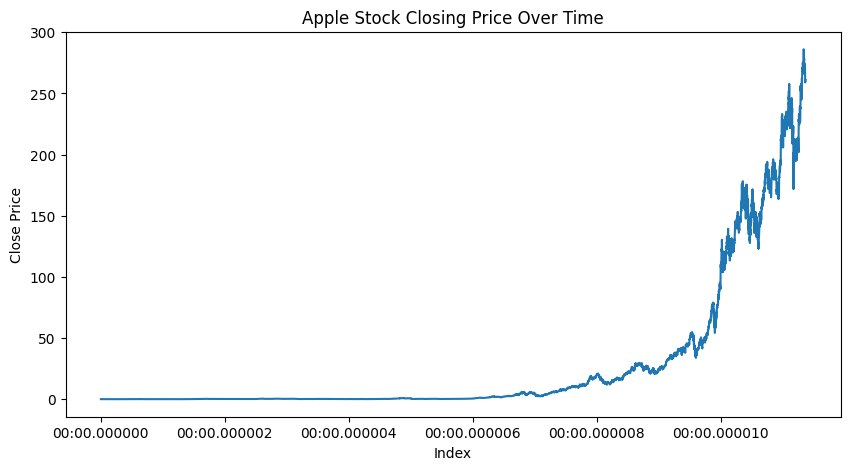

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(data['Close'])
plt.title("Apple Stock Closing Price Over Time")
plt.xlabel("Index")
plt.ylabel("Close Price")
plt.show()


In [11]:
close_prices = data[['Close']]
print(close_prices.head())


                                  Close
1970-01-01 00:00:00.000000002  0.098389
1970-01-01 00:00:00.000000003  0.093256
1970-01-01 00:00:00.000000004  0.086412
1970-01-01 00:00:00.000000005  0.088550
1970-01-01 00:00:00.000000006  0.091118


In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(close_prices)

print(scaled_prices[:5])


[[0.00021228]
 [0.00019434]
 [0.00017042]
 [0.0001779 ]
 [0.00018687]]


In [16]:
X = []
y = []

window_size = 60

for i in range(window_size, len(scaled_prices)):
    X.append(scaled_prices[i - window_size:i, 0])
    y.append(scaled_prices[i, 0])

X, y = np.array(X), np.array(y)

print(X.shape, y.shape)


(11303, 60) (11303,)


In [17]:
X = X.reshape((X.shape[0], X.shape[1], 1))
print(X.shape)


(11303, 60, 1)


In [18]:
split = int(0.8 * len(X))

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print(X_train.shape, X_test.shape)


(9042, 60, 1) (2261, 60, 1)
